In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

Importing laptop dataset

In [5]:
laptop_data = pd.read_csv(r"/content/laptop.csv")
laptop_data

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
laptop_data.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


from few basic checks we are aware of dataset, its having 1303rows × 13columns and all columns are of object type exept price column col.

We are creating a copy of imported dataset so that during data processing steps if we lost important features than we can flip back to base file and we don't need to import file again.

In [7]:
data=laptop_data.copy()

As Unnamed:0.1 and Unnamed:0 are not providing any specific feature details and it's basically copy of index column, I'm removing these columns

In [8]:
# Droping irrelevant columns
data = data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


Now we will check for missing values and duplicate rows

In [9]:
# Check for missing values
data.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


Wait !! It's showing 30 missing rows in each column, for better understanding we'll drill through these missing values.
we can see values are missing through entire row so we can drop these rows.

In [10]:
# Check for missing values
data[data.isnull().any(axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data=data.dropna().reset_index(drop=True)
print(data.isna().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


Now droping duplicate rows and creating new index

In [12]:
# Check for duplicate rows (including all columns)
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove exact duplicate rows
data = data.drop_duplicates()
print(f"Dataset size after removing duplicates: {data.shape}")

Number of duplicate rows: 29
Dataset size after removing duplicates: (1244, 11)


In [13]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


Now converting Ram, Inches, Weight columns int number dtype by removing GB and kg.
while exploring I found "?" at few instances so I replaced it with appropriate mode value and removed outliers by IQR method.

In [14]:
data["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [15]:
# Ram column - Removing "GB" and converting into int datatype
data["Ram"]=data["Ram"].str.replace("GB","").astype(int)

In [16]:
data["Inches"].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [17]:
# Inches column - converting into float datatyoe and filling "?"
data["Inches"] = data["Inches"].replace("?",np.nan).astype(float)
data["Inches"]= data["Inches"].fillna(data["Inches"].mode()[0])

<Axes: xlabel='Inches'>

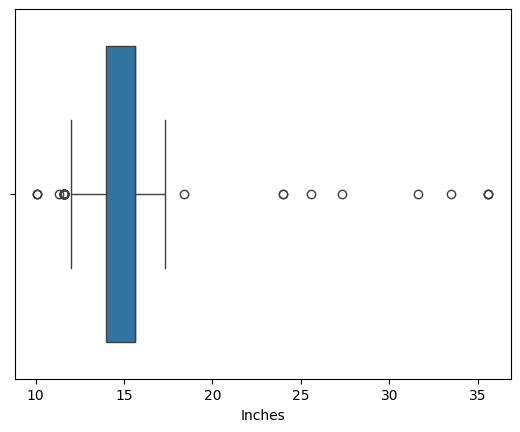

In [18]:
sns.boxplot(x=data["Inches"])

In [19]:
Q1=data["Inches"].quantile(0.25)
Q3=data["Inches"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(f"lower limit:{lower:0.2F} ,upper limit:{upper:.2f}")

lower limit:11.60 ,upper limit:18.00


In [20]:
data["Inches"] = np.where(data["Inches"]<lower,lower,data["Inches"])
data["Inches"] = np.where(data["Inches"]>upper,upper,data["Inches"])

<Axes: xlabel='Inches'>

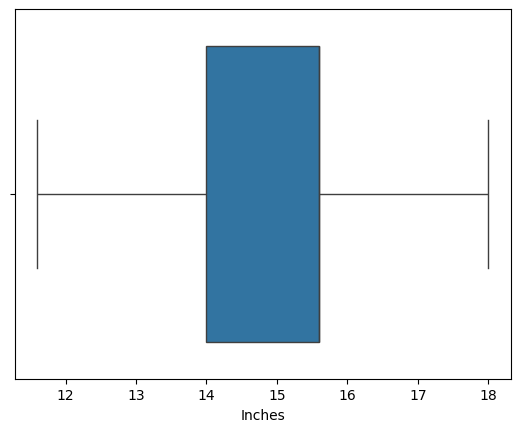

In [21]:
sns.boxplot(x=data["Inches"])

In [22]:
data["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [23]:
# Weight column - Removing "kg" to convert into float datatyoe and filling "?"
data["Weight"]=data["Weight"].str.replace("kg","")
data["Weight"]=data["Weight"].replace("?",np.nan).astype(float)
data["Weight"]=data["Weight"].fillna(data["Weight"].mode()[0])

<Axes: xlabel='Weight'>

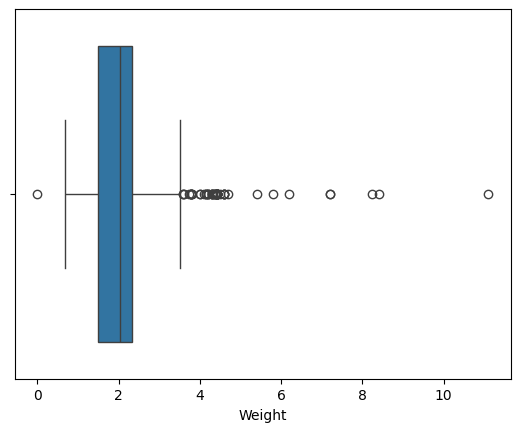

In [24]:
sns.boxplot(x=data["Weight"])

In [25]:
Q1=data["Weight"].quantile(0.25)
Q3=data["Weight"].quantile(0.75)
IQR=Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
print(f"lower limit:{lower:0.2F} ,upper limit:{upper:.2f}")

lower limit:0.25 ,upper limit:3.58


In [26]:
data["Weight"]=np.where(data["Weight"]>upper,upper,data["Weight"])
data["Weight"] = np.where(data["Weight"]<lower,lower,data["Weight"])

<Axes: xlabel='Weight'>

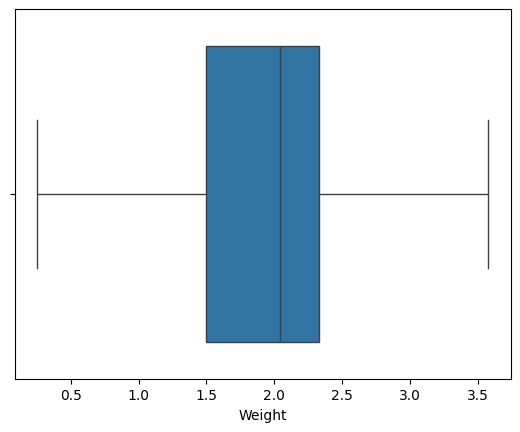

In [27]:
sns.boxplot(x=data["Weight"])

In [28]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


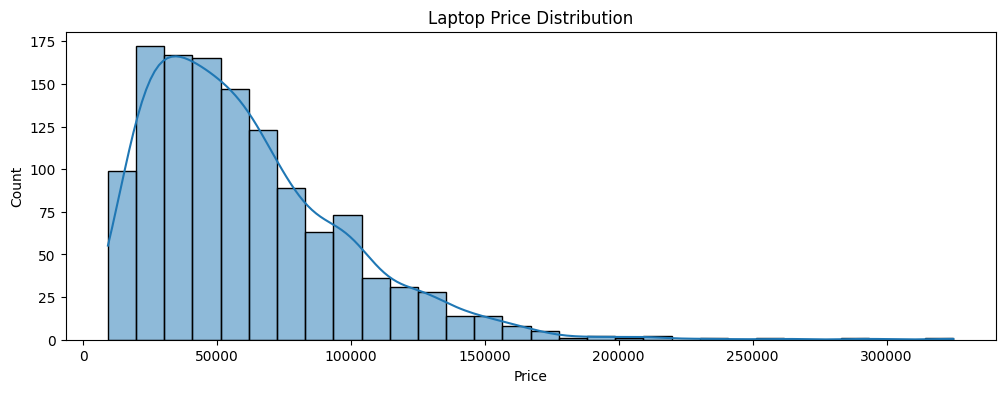

In [29]:
plt.figure(figsize=(12,4))
sns.histplot(data["Price"],kde=True,bins=30)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Laptop Price Distribution")
plt.show()

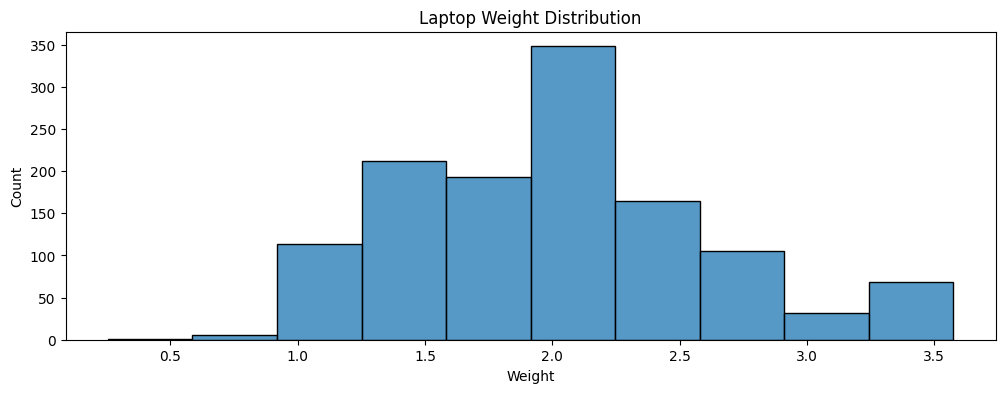

In [30]:
plt.figure(figsize=(12,4))
sns.histplot(data["Weight"],bins=10)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Laptop Weight Distribution")
plt.show()

Here average price of Razor gadgets are higher than any brands

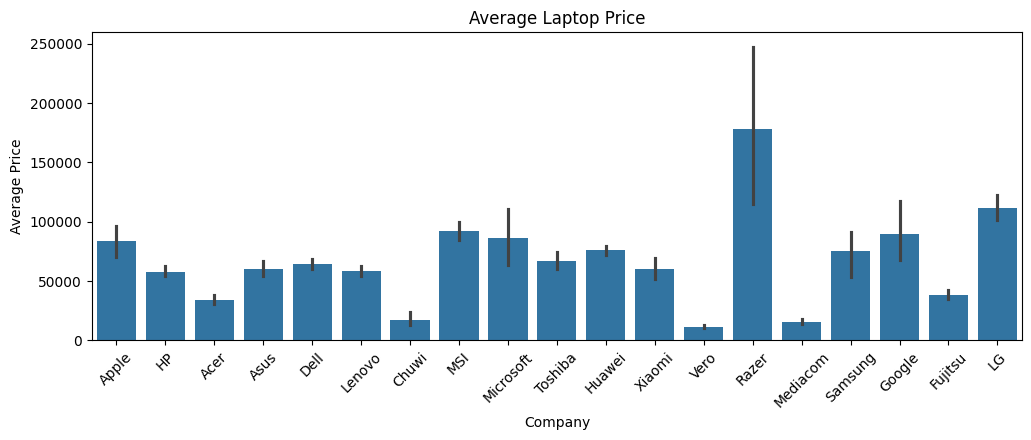

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(x=data["Company"],y=data["Price"])
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.title("Average Laptop Price")
plt.xticks(rotation=45)
plt.show()

We can see notebook is widely accepted electronic gadget

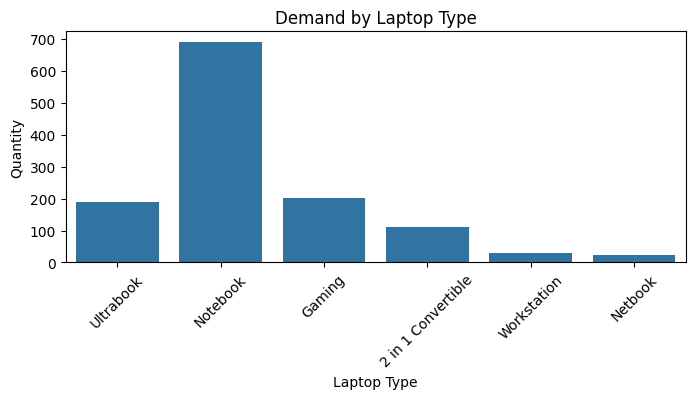

In [32]:
plt.figure(figsize=(8,3))
sns.countplot(data,x="TypeName")
plt.xlabel("Laptop Type")
plt.ylabel("Quantity")
plt.title("Demand by Laptop Type")
plt.xticks(rotation=45)
plt.show()

This countplot shows customer choices by brand

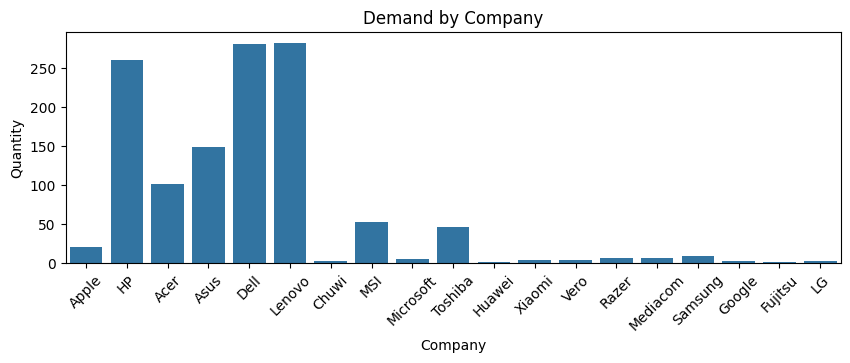

In [33]:
plt.figure(figsize=(10,3))
sns.countplot(data,x="Company")
plt.xlabel("Company")
plt.ylabel("Quantity")
plt.title("Demand by Company")
plt.xticks(rotation=45)
plt.show()

Now we will proceed with other categorical columns

As resolution type holds important display information extracting length, width, screen type (like full hd, 4k ultra hd etc) from screen resolution and creating new column for each

In [34]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [35]:
# 1. Extracting resolution using regular expressions
data["Width"] = data["ScreenResolution"].str.extract(r"(\d+)x").astype(int)
data["Height"] = data["ScreenResolution"].str.extract(r"x(\d+)").astype(int)

# 2. Extracting display type (Full HD, 4K Ultra HD, Retina Display)
data["Display"] = data["ScreenResolution"].str.extract(r"(Full HD|4K Ultra HD|Retina Display)")
data["Display"].fillna("Standard", inplace=True)

# 3. extracting touchscreen type and replacing 1 for true and 0 for false
data['Touchscreen'] = data['ScreenResolution'].str.contains('Touchscreen',case=False).astype(int)

# 4. drop ScreenResolution and Resolution columns
data.drop(["ScreenResolution"],axis=1,inplace=True)

Now finding the correlation between newly created features and our target feature price

In [36]:
num_col = data.select_dtypes(include="number")
num_col.head(3)

,Inches,Ram,Weight,Price,Width,Height,Touchscreen
0,13.3,8,1.37,71378.6832,2560,1600,0
1,13.3,8,1.34,47895.5232,1440,900,0
2,15.6,8,1.86,30636.0000,1920,1080,0


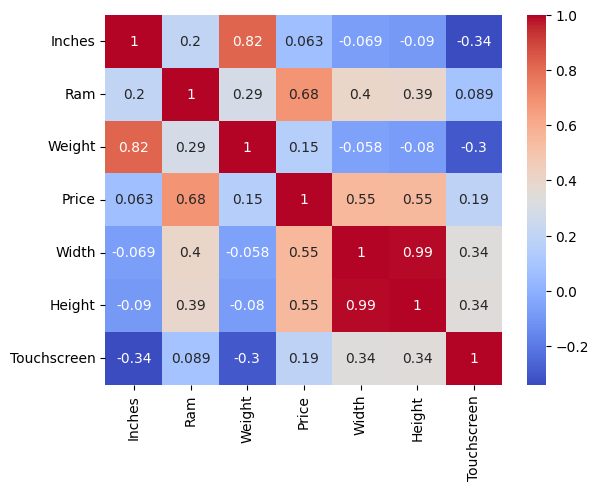

In [37]:
sns.heatmap(num_col.corr(), annot = True, cmap="coolwarm")
plt.show()

We can see Inches is not correlated, also width and height are positivly correlated.
so now I'll combine three of the columns that represents same information and creat new column ppi

In [38]:
data["PPI"] = np.sqrt(data["Width"]**2 +data["Height"]**2) / data["Inches"].astype(float)
data.drop(["Width","Height","Inches"],axis=1,inplace=True)

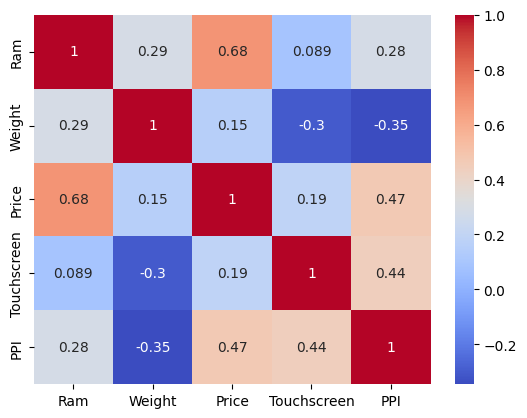

In [39]:
num_col2 = data.select_dtypes(include="number")
sns.heatmap(num_col2.corr(), annot = True, cmap="coolwarm")
plt.show()

This is visual representation of laptop brands by ppi

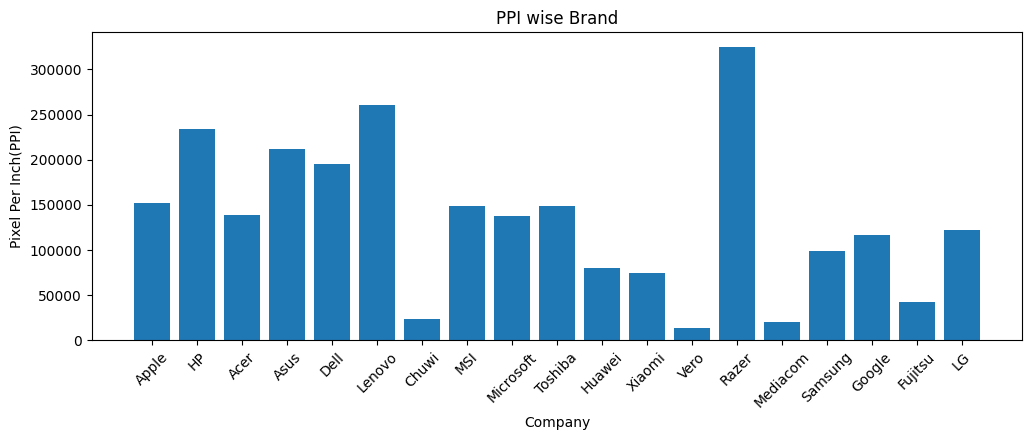

In [40]:
plt.figure(figsize=(12,4))
plt.bar(data["Company"],data["Price"])
plt.xlabel("Company")
plt.ylabel("Pixel Per Inch(PPI)")
plt.title("PPI wise Brand")
plt.xticks(rotation=45)
plt.show()

Here we can see touchscreen feature details

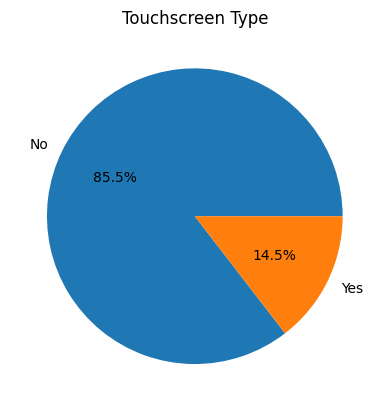

In [41]:
plt.pie(data["Touchscreen"].value_counts(),labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Touchscreen Type")
plt.show()

This gives us a glimse of how laptops enclose different quality of display

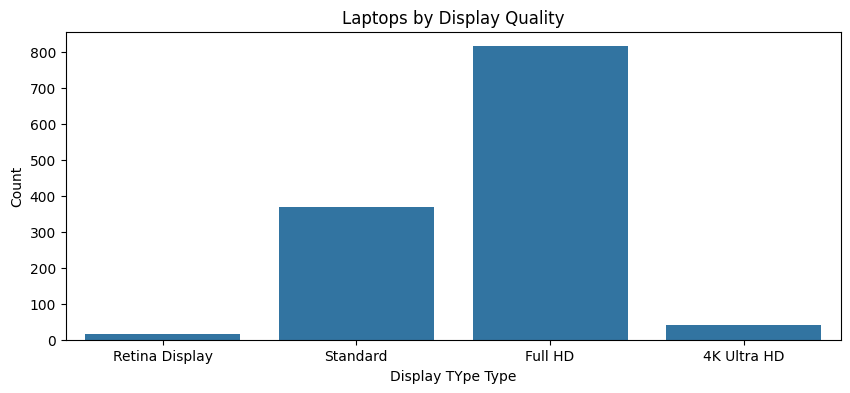

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(data, x=data["Display"])
plt.xlabel("Display TYpe Type")
plt.ylabel("Count")
plt.title("Laptops by Display Quality")
plt.show()

Now I'll extract important features from the remaining columns cpu,gpu and opsys in similar way and finally convert them into number dtype

In [43]:
data.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Retina Display,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Standard,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD,0,141.211998


In [44]:
data['Cpu'] = data['Cpu'].str.extract('(Intel|AMD)')
data['Cpu']=np.where(data['Cpu'].isna(),"Other",data['Cpu'])
data.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI
0,Apple,Ultrabook,Intel,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Retina Display,0,226.983005
1,Apple,Ultrabook,Intel,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Standard,0,127.677940
2,HP,Notebook,Intel,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD,0,141.211998


This graph shows the processor widely implemented

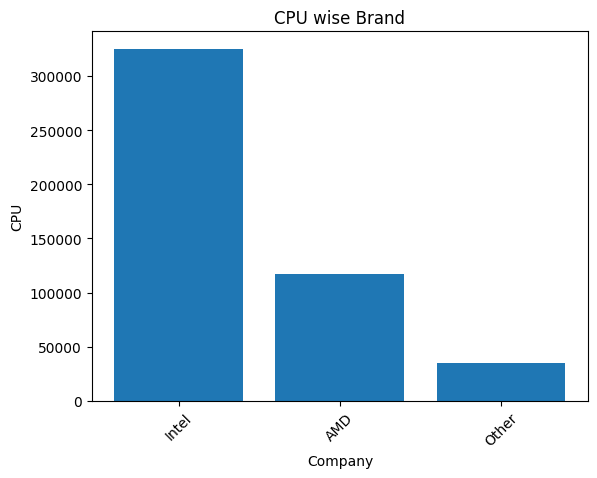

In [45]:
plt.bar(data["Cpu"],data["Price"])
plt.xlabel("Company")
plt.ylabel("CPU")
plt.title("CPU wise Brand")
plt.xticks(rotation=45)
plt.show()

In [46]:
data["Gpu"]=data["Gpu"].str.extract("(Intel|AMD|Nvidia)").fillna("Other")
data.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI
0,Apple,Ultrabook,Intel,8,128GB SSD,Intel,macOS,1.37,71378.6832,Retina Display,0,226.983005
1,Apple,Ultrabook,Intel,8,128GB Flash Storage,Intel,macOS,1.34,47895.5232,Standard,0,127.677940
2,HP,Notebook,Intel,8,256GB SSD,Intel,No OS,1.86,30636.0000,Full HD,0,141.211998


In [47]:
Gpu_count = data["Gpu"].value_counts()

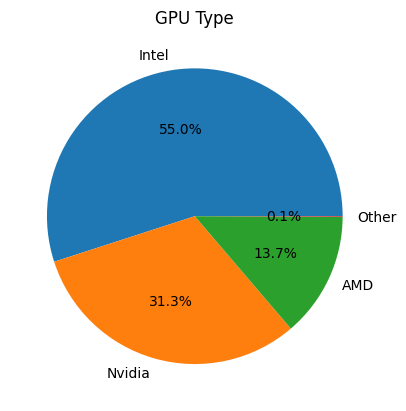

In [48]:
plt.pie(Gpu_count,labels=Gpu_count.index,autopct="%1.1f%%")
plt.title("GPU Type")
plt.show()

In [49]:
data["OpSys"] =np.where((data["OpSys"]=="macOS") | (data["OpSys"]=="Mac OS"), "Mac",data["OpSys"])
data["OpSys"] =data["OpSys"].str.extract("(Mac|Windows|Linux)").fillna("Other")
data.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI
0,Apple,Ultrabook,Intel,8,128GB SSD,Intel,Mac,1.37,71378.6832,Retina Display,0,226.983005
1,Apple,Ultrabook,Intel,8,128GB Flash Storage,Intel,Mac,1.34,47895.5232,Standard,0,127.677940
2,HP,Notebook,Intel,8,256GB SSD,Intel,Other,1.86,30636.0000,Full HD,0,141.211998


In [50]:
OpSys_count=data["OpSys"].value_counts()

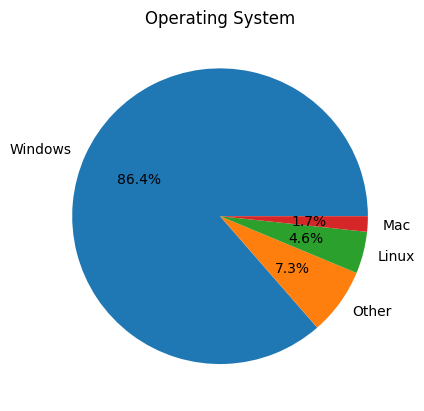

In [51]:
plt.pie(OpSys_count,labels=OpSys_count.index,autopct="%1.1f%%")
plt.title("Operating System")
plt.show()

For memory column I will extract memories in TB and GB ,convert TB into GB and create new feature Total_GB

In [52]:
memory_type=data[data["Memory"] != "?"]["Memory"].mode()[0]
data["Memory"]=np.where(data["Memory"]=="?",memory_type,data["Memory"])

In [53]:
sizes=data['Memory'].apply(lambda x: re.findall(r'(\d+\.?\d*)[ ]?(GB|TB)', x))
data['Total_GB'] = sizes.apply(lambda size_list: sum(float(size) * (1024 if unit == 'TB' else 1) for size, unit in size_list))
data.drop("Memory",axis=1,inplace=True)
data.head(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI,Total_GB
0,Apple,Ultrabook,Intel,8,Intel,Mac,1.37,71378.6832,Retina Display,0,226.983005,128.0
1,Apple,Ultrabook,Intel,8,Intel,Mac,1.34,47895.5232,Standard,0,127.677940,128.0
2,HP,Notebook,Intel,8,Intel,Other,1.86,30636.0000,Full HD,0,141.211998,256.0


In [54]:
data["OpSys"] =np.where((data["OpSys"]=="macOS") | (data["OpSys"]=="Mac OS"), "Mac",data["OpSys"])
data["OpSys"] =data["OpSys"].str.extract("(Mac|Windows|Linux)").fillna("Other")
data.head(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI,Total_GB
0,Apple,Ultrabook,Intel,8,Intel,Mac,1.37,71378.6832,Retina Display,0,226.983005,128.0
1,Apple,Ultrabook,Intel,8,Intel,Mac,1.34,47895.5232,Standard,0,127.677940,128.0
2,HP,Notebook,Intel,8,Intel,Other,1.86,30636.0000,Full HD,0,141.211998,256.0


Now testing correlation of different independent features with our target feature price

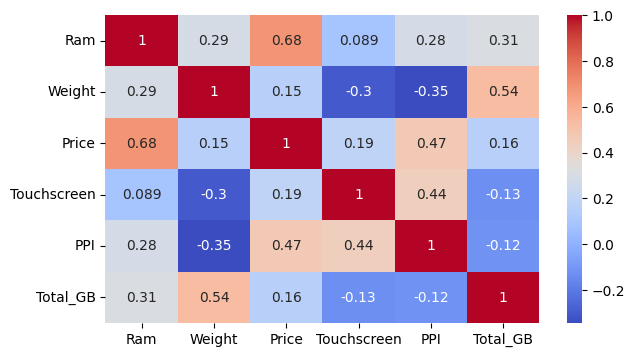

In [55]:
num_col2 = data.select_dtypes(include="number")
plt.figure(figsize=(7,4))
sns.heatmap(num_col2.corr(), annot = True, cmap="coolwarm")
plt.show()

In [56]:
# seperate independent features (x) and target (y)
Y = data[["Price"]]
X = data.drop(columns=["Price"])

Testing collinearity within independent features

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_col2.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num_col2.values, i) for i in range(len(num_col2.columns))]
print(vif_data)

       feature       VIF
0          Ram  6.882754
1       Weight  9.165550
2        Price  7.930256
3  Touchscreen  1.499233
4          PPI  8.777823
5     Total_GB  3.831588


In [60]:
data.head(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Display,Touchscreen,PPI,Total_GB
0,Apple,Ultrabook,Intel,8,Intel,Mac,1.37,71378.6832,Retina Display,0,226.983005,128.0
1,Apple,Ultrabook,Intel,8,Intel,Mac,1.34,47895.5232,Standard,0,127.677940,128.0
2,HP,Notebook,Intel,8,Intel,Other,1.86,30636.0000,Full HD,0,141.211998,256.0


At this stage we are gradually proceeding towards designing our model

But before that I need to convert all the categorical fratures into machine readable format for that first I will use one hot encoder to convert categorical features followed by standard scalar for standargizing all the features

In [61]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse_output=False)
for column in ["Company", "TypeName", "Cpu", "Gpu", "OpSys", "Display"]:
    encoded_data = ohe.fit_transform(data[[column]])
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([column]))
    data = pd.concat([data, encoded_df], axis=1)
    data.drop(column, axis=1, inplace=True)

data.head(3)

,Ram,Weight,Price,Touchscreen,PPI,Total_GB,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Cpu_Other,Gpu_Intel,Gpu_Nvidia,Gpu_Other,OpSys_Mac,OpSys_Other,OpSys_Windows,Display_Full HD,Display_Retina Display,Display_Standard
0,8,1.37,71378.6832,0,226.983005,128.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,8,1.34,47895.5232,0,127.677940,128.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,8,1.86,30636.0000,0,141.211998,256.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


 I will seperate out dependent feature(Y) and independent frature(X) and then check collinearity within independent features.

In [62]:
X=data.drop(columns=["Price"])
Y=data["Price"]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                   feature        VIF
0                      Ram   5.489977
1                   Weight  29.252735
2              Touchscreen   4.075678
3                      PPI  24.295159
4                 Total_GB   4.529394
5            Company_Apple        inf
6             Company_Asus   2.602248
7            Company_Chuwi   1.117623
8             Company_Dell   4.321454
9          Company_Fujitsu   1.027935
10          Company_Google   1.141116
11              Company_HP   3.842475
12          Company_Huawei   1.043162
13              Company_LG   1.083030
14          Company_Lenovo   4.088669
15             Company_MSI   2.008902
16        Company_Mediacom   1.112191
17       Company_Microsoft   1.196283
18           Company_Razer   1.190702
19         Company_Samsung   1.259145
20         Company_Toshiba   1.579819
21            Company_Vero   1.062026
22          Company_Xiaomi   1.098526
23         TypeName_Gaming   9.393830
24        TypeName_Netbook   1.573446
25       Typ

Now I'm using Standard Scaler to standardize independent feature X

In [64]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)
X_df=pd.DataFrame(X_ss,columns=X.columns)
X_df.head(3)

,Ram,Weight,Touchscreen,PPI,Total_GB,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Cpu_Other,Gpu_Intel,Gpu_Nvidia,Gpu_Other,OpSys_Mac,OpSys_Other,OpSys_Windows,Display_Full HD,Display_Retina Display,Display_Standard
0,-0.094569,-1.074036,-0.412641,1.875219,-1.021545,7.631389,-0.368881,-0.049167,-0.540182,-0.040129,...,-0.028364,0.904828,-0.674515,-0.028364,7.631389,-0.280935,-2.522092,-1.380776,8.495674,-0.649395
1,-0.094569,-1.122709,-0.412641,-0.443311,-1.021545,7.631389,-0.368881,-0.049167,-0.540182,-0.040129,...,-0.028364,0.904828,-0.674515,-0.028364,7.631389,-0.280935,-2.522092,-1.380776,-0.117707,1.539894
2,-0.094569,-0.279042,-0.412641,-0.127324,-0.756780,-0.131038,-0.368881,-0.049167,-0.540182,-0.040129,...,-0.028364,0.904828,-0.674515,-0.028364,-0.131038,3.559541,-2.522092,0.724230,-0.117707,-0.649395


While creating model and feeding data there are so many instances when we can loose some important features that we created during test and error method.

so creating copy of dependent feature(Y) and independent features(X). Now I don't need to run entire code.

In [79]:
X1=X_df.copy()
Y1=Y.copy()

# **Lasso Model**

In [83]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

lasso_model = Lasso(alpha=20)

# Fit the GridSearch on data
lasso_model.fit(x_train,y_train)
score=lasso_model.score(x_train,y_train)

pred = lasso_model.predict(x_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

# Display best parameters and best score
print("Lasso Model mean_absolute_error:",mae )
print("Training Score:", score)
print("Lasso Model R² Score:", R2_score)

Lasso Model mean_absolute_error: 13674.050652420725
Training Score: 0.7079083232325436
Lasso Model R² Score: 0.6907356947035


Hyper Parameter tuning

In [84]:
gs_lasso = Lasso()

# Define parameter grid for Lasso Regression
param_grid = {
    'alpha': [0.01, 1, 10,20,30],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],      # Number of iterations
    'tol': [1e-4, 1e-5]            # Convergence tolerance
}

# Initialize GridSearchCV for Lasso
G_lasso = GridSearchCV(estimator=gs_lasso, param_grid=param_grid, cv=5)

# Fit the GridSearch on data
G_lasso.fit(X, Y)

# Display best parameters and best score
print("Best Parameters:", G_lasso.best_params_)
print("Best Score (R2):", G_lasso.best_score_)

Best Parameters: {'alpha': 10, 'fit_intercept': True, 'max_iter': 1000, 'tol': 1e-05}
Best Score (R2): 0.65658417843935


In [85]:
lasso_model = Lasso(alpha=10, fit_intercept=True, max_iter=1000, tol=1e-5)

# Fit the GridSearch on data
lasso_model.fit(x_train,y_train)
score=lasso_model.score(x_train,y_train)

pred = lasso_model.predict(x_test)

# Display best parameters and best score
mae = mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

# Display best parameters and best score
print("Lasso Model mean_absolute_error:",mae )
print("Training Score:", score)
print("Lasso Model R² Score:", R2_score)

Lasso Model mean_absolute_error: 13691.26889716677
Training Score: 0.7079446596082093
Lasso Model R² Score: 0.6905327248297608


In [86]:
coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

Coefficients: [ 1.46046395e+04  6.38795907e+03 -1.55990152e+03  9.15736706e+03
 -4.86476883e+02  1.84005138e+03  1.29310507e+03 -1.34948045e+03
  3.40848137e+03  3.53639567e+02  1.52822407e+03  5.49084992e+03
  3.31061379e+02  2.53685602e+03  4.54791230e+03  3.07759996e+03
 -1.31675235e+03  1.72378976e+03  5.13444659e+03  1.84653271e+03
  4.12727349e+03 -7.37283068e+02  8.53689685e+02 -8.11716103e+02
 -1.29345695e+03 -8.87272288e+03  9.59130018e+02  6.17120539e+03
  1.30399406e+03 -2.91103906e+02  4.20162561e+03  3.59102025e+03
 -3.18620384e-03  7.52880446e+01 -2.46982009e+03  2.52972414e+03
  1.44451178e+03  1.19986357e+03 -1.89914044e+02]


In [87]:
lasso_df = pd.DataFrame(data=coefficients, index=X1.columns, columns=["Coefficient"])
lasso_df.sort_values(by="Coefficient", ascending=False)

,Coefficient
Ram,14604.639474
PPI,9157.367062
Weight,6387.959074
TypeName_Workstation,6171.205387
Company_HP,5490.849925
Company_Razer,5134.446590
Company_Lenovo,4547.912304
Gpu_Intel,4201.625607
Company_Toshiba,4127.273487
Gpu_Nvidia,3591.020251


In [88]:
X1=X1.drop("Gpu_Other", axis=1)

After droping the Gpu_Other feature again testing Lasso Model with hyperparameter

In [96]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

gs_lasso = Lasso()

# Define parameter grid for Lasso Regression
param_grid = {
    'alpha': [0.01, 1, 10,20,30],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],      # Number of iterations
    'tol': [1e-4, 1e-5]            # Convergence tolerance
}

# Initialize GridSearchCV for Lasso
G_lasso = GridSearchCV(estimator=gs_lasso, param_grid=param_grid, cv=5)

# Fit the GridSearch on data
G_lasso.fit(X1, Y1)

# Display best parameters and best score
print("Best Parameters:", G_lasso.best_params_)
print("Best Score (R2):", G_lasso.best_score_)

Best Parameters: {'alpha': 30, 'fit_intercept': True, 'max_iter': 1000, 'tol': 1e-05}
Best Score (R2): 0.6567432563778268


In [97]:
lasso_model = Lasso(alpha=10, fit_intercept=True, max_iter=1000, tol=1e-5)

# Fit the GridSearch on data
lasso_model.fit(x_train,y_train)
score=lasso_model.score(x_train,y_train)

pred = lasso_model.predict(x_test)

# Display best parameters and best score
mae = mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

# Display best parameters and best score
print("Lasso Model mean_absolute_error:",mae )
print("Training Score:", score)
print("Lasso Model R² Score:", R2_score)

Lasso Model mean_absolute_error: 13691.268893490875
Training Score: 0.7079446596017336
Lasso Model R² Score: 0.69053272491304


In [98]:
coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

Coefficients: [14604.63948104  6387.95906709 -1559.90149425  9157.36702645
  -486.47688011  1840.03445079  1293.10506146 -1349.48045598
  3408.4813479    353.63956585  1528.22406822  5490.84991769
   331.06137743  2536.85601317  4547.91230459  3077.59995544
 -1316.75235303  1723.78975751  5134.44658829  1846.53263012
  4127.27347679  -737.28306875   853.68968786  -811.71605387
 -1293.45692189 -8872.72281367   959.13007398  6171.20540597
  1303.99411132  -291.10687192  4201.62556984  3591.02020718
    75.30497269 -2469.82010768  2529.72415023  1444.51176508
  1199.86357134  -189.91407395]


In [99]:
lasso_df = pd.DataFrame(data=coefficients, index=X1.columns, columns=["Coefficient"])
lasso_df.sort_values(by="Coefficient", ascending=False)

,Coefficient
Ram,14604.639481
PPI,9157.367026
Weight,6387.959067
TypeName_Workstation,6171.205406
Company_HP,5490.849918
Company_Razer,5134.446588
Company_Lenovo,4547.912305
Gpu_Intel,4201.625570
Company_Toshiba,4127.273477
Gpu_Nvidia,3591.020207


**Lasso_Model_Best_score = 0.70794**

**R2_Score = 0.69053**

.

# **Simple Linear Regression model**

In [100]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (995, 38)
Test set shape: (249, 38)


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
score=linear_regression.score(x_train, y_train)

# Make predictions on the test set
pred = linear_regression.predict(x_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

# Display best parameters and best score
print("Linear Regression mean_absolute_error:",mae )
print("Training Score:", score)
print("Linear Regression R² Score:", R2_score)

Linear Regression mean_absolute_error: 13709.396196194946
Training Score: 0.7079567454074036
Linear Regression R² Score: 0.6902810773289898


**Linear_Regression_Model_Best_score = 0.70796**

**R2_Score = 0.69028**

.

# **Random Forest Regressor Model**

In [103]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (995, 38)
Test set shape: (249, 38)


**Hyperparameter Tuning**

In [104]:
rf = RandomForestRegressor()

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(x_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest MAE: 11456.609545105997
Random Forest R² Score: 0.7162285711506329


In [105]:
random_forest = RandomForestRegressor( max_depth=30, min_samples_split=2, n_estimators=50)

random_forest.fit(x_train,y_train)
score=random_forest.score(x_train,y_train)

pred = random_forest.predict(x_test)

mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

print("Random Forest MAE:", mae)
print("Training Score:", score)
print("Random Forest R² Score:", R2_score)

Random Forest MAE: 13709.396196194946
Training Score: 0.9604635822657207
Random Forest R² Score: 0.7084101705586943


**Random_Forest_Regressor_Model_Best_score = 0.96034**

**R2_Score = 0.72346**

-

# **Support Vector Machine Model**

**Hyperparameter Tuning**

In [106]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (995, 38)
Test set shape: (249, 38)


In [236]:
model = SVR()

param_grid = {"C": [0.1, 1, 10],
    "kernel": ['linear', 'poly', 'rbf'],
    "gamma": ['scale', 'auto', 0.1, 1],
    "epsilon": [0.01, 0.1, 1],
    "degree": [2]}
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1,
                           scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", grid_search.best_score_)


Best Parameters: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 1, 'kernel': 'poly'}
Best Score (MSE): -495447445.6030161


In [107]:
support_vector=SVR(C=10, degree=2, epsilon= 1, gamma=1, kernel="poly")

support_vector.fit(x_train,y_train)
score=support_vector.score(x_train,y_train)

pred = support_vector.predict(x_test)

mae = mean_absolute_error(y_test, pred)
R2_score = r2_score(y_test, pred)

print("Support vector machine MAE:", mae)
print("Training Score:", score)
print("Support vector machine R² Score:", R2_score)

Support vector machine MAE: 13818.74142994778
Training Score: 0.7339207199936866
Support vector machine R² Score: 0.6218977853050713


**Support_Vector_Machine_Best_score = 0.73392**

**R2_Score = 0.62685**

.

# **Gradient Boosting Regressor Model**

**Hyperparameter Tuning**

In [108]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (995, 38)
Test set shape: (249, 38)


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.20, random_state=42)

gbr = GradientBoostingRegressor()

param_grid = {"n_estimators": [100, 200],      # Number of boosting stages
    "learning_rate": [0.01, 0.1, 0.05],  # Step size shrinkage
    "max_depth": [3, 4, 5],               # Depth of each tree
    "min_samples_split": [2, 5, 10],      # Min samples to split
    "min_samples_leaf": [1, 2, 4],        # Min samples in a leaf
    "loss": ['squared_error']}    # Loss function

GS = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5,
                  n_jobs=-1, scoring="neg_mean_squared_error")

GS.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters:", GS.best_params_)

Best Parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [109]:
gradient_boosting = GradientBoostingRegressor(learning_rate=0.10,loss="squared_error",
                                  max_depth=4, min_samples_leaf=1, n_estimators=190,
                                  min_samples_split=10, subsample=0.7)
gradient_boosting.fit(x_train,y_train)
score=gradient_boosting.score(x_train,y_train)

pred = gradient_boosting.predict(x_test)
R2_score = r2_score(y_test, pred)

print("Gradient Boosting MAE:", mean_absolute_error(y_test, pred))
print("Training Score:", score)
print("Gradient Boosting R² Score:", R2_score)

Gradient Boosting MAE: 10825.492610153515
Training Score: 0.9405975713207524
Gradient Boosting R² Score: 0.7471451109962359


**Gradient Boosting Regressor Model_Best_score = 0.93938**

**R2_Score = 0.72684**

.

## **Predicting Laptop Price**

In [110]:
def predict_new_laptop(features):
    """
    Predicts the price of a new laptop given its features.
    Arguments:
        features (list): List of feature values in the same order as the training data.
    Returns:
        float: Predicted price.
    """
    return linear_regression.predict([features])

new_laptop_features = [-0.094569,-1.122709,-0.412641,-0.443311,-1.021545,7.631389,	-0.368881,
                       -0.049167,	-0.540182,	-0.040129,	-0.049167,	-0.514031,	-0.040129,
                       -0.049167,	-0.541423,-0.210951,	-0.075225,	-0.069617,	-0.075225,
                       -0.085367,	-0.198154,	-0.056796,	-0.056796,	-0.441593,	-0.134176,
                       -1.114200,	2.362628,	-0.154494,	0.227077,	-0.028364,	0.904828,	-0.674515,
                       7.631389,	-0.280935,	-2.522092,	-1.380776,	-0.117707,	1.539894]

predicted_price = predict_new_laptop(new_laptop_features)
print("Predicted Price for New Laptop: INR", predicted_price)

# Available models [lasso_model.predict | linear_regression.predict | random_forest.predict
#                   support_vector.predict | gradient_boosting.predict]

Predicted Price for New Laptop: INR [59313.97888633]
